In [2]:
# Import key library functions needed.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score 
from sklearn.metrics import explained_variance_score

# Load the data.
cars = pd.read_csv('./data/cars.csv')
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Get all non-MPG columns for the features.
data_x = cars[list(cars)[1:]]

# Get MPG as the target variable.
data_y = cars['mpg']

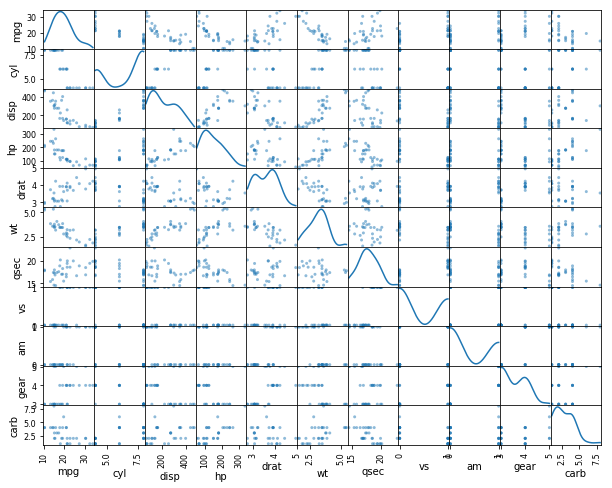

In [4]:
# Do a pairs plot to see potential relationships.
plt.rcParams['figure.figsize']=[10,8]
sm = pd.plotting.scatter_matrix(cars, diagonal='kde')
plt.show()

### 2/27 Regression Models Continued:

In [5]:
# Using sklearn.model_selection import train_test_split. This splits the testing and training data randomly so you can
#continue to run this model with randomly selected training and testing data 
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4)

# Look at different feature sets to see how well they predict HP
featset_1 = ['hp']
featset_2 = ['hp','wt','drat']
featset_3 = ['hp','wt','cyl']
featset_4 = list(x_train)

feature_sets_to_try = [featset_1, featset_2, featset_3, featset_4]

### Make a single simple linear regression model to illustrate basic workflow 

In [ ]:
#using sklearn import linear_model
#construct model object
model = linear_model.LinearRegression()
model.fit(x_train, y_train) #Fit the model
preds = model.predict(x_test) #Build predictions on the test data

#Look at actual vs predicted values:
print(pd.DataFrame({'Actual': y_test, 'Predicted': pred}))

#Look at the error metrics:
print('Mean Squared Error, Median Absolute Error, R^2, Expected Variance Explained: \n' + 
      str([mean_squared_error(y_test, preds),
          median_absolute_error(y_test, preds),
          r2_score(y_test, preds), explained_variance_score(y_test, preds)]))

### Look at effect of different feature sets on the quality of results

In [8]:
for f in feature_sets_to_try:
    model = linear_model.LinearRegression() #construct model object
    model.fit(x_train[f], y_train) #fit model using all features aka model 4
    preds = model.predict(x_test[f]) #build predictions on the test data 
    print('MSE, MAE, R^2, EVS for feature set '+ str(f)+': '+str([mean_squared_error(y_test, preds),
                                                                 median_absolute_error(y_test, preds),
                                                                 r2_score(y_test, preds),
                                                                 explained_variance_score(y_test, preds)]))
    

MSE, MAE, R^2, EVS for feature set ['hp']: [27.516685119002656, 1.5636219218266376, 0.5896132160807157, 0.6139326231772637]
MSE, MAE, R^2, EVS for feature set ['hp', 'wt', 'drat']: [19.88407756330374, 2.6279205403576356, 0.7034467412366281, 0.8046663546598399]
MSE, MAE, R^2, EVS for feature set ['hp', 'wt', 'cyl']: [18.816951600501145, 3.5280819067169773, 0.71936197194183, 0.7869455733337797]
MSE, MAE, R^2, EVS for feature set ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']: [24.51493293197121, 4.3870307737591006, 0.634381669142229, 0.7656962491586179]
